In [77]:
import igraph as ig
import numpy as np
import random
import matplotlib.pyplot as plt
from typing import Tuple
import pandas as pd

random.seed(0)

# Part 1

1a

A binomial distribution is observed. This is because there are $n-1 \choose d$ ways to choose $d$ vertices among $n-1$ nodes (we exclude self-connections). Each node has $p^d$ probability of connecting to $d$ vertices. Since these must be no edges to the remaining $n-1-d$ nodes which occur with probability $(1-p)^{n-1-d}$ we get the probability that 2 nodes are connected as $Prob[d] = {n-1\choose} p^d (1-p)^{n-1-d}$. Since $n$ is sufficiently large $n-1\approx n$

   Theoretical Mean  Calc Mean  Theoretical Variance  Calc Variance
0             1.798   1.720000              1.794404       1.470489
1             5.394   5.266667              5.361636       5.666667
2            10.788  10.602222             10.658544      11.028440
3            40.455  40.224444             38.634525      35.476291
4            89.900  90.333333             80.910000      77.242222


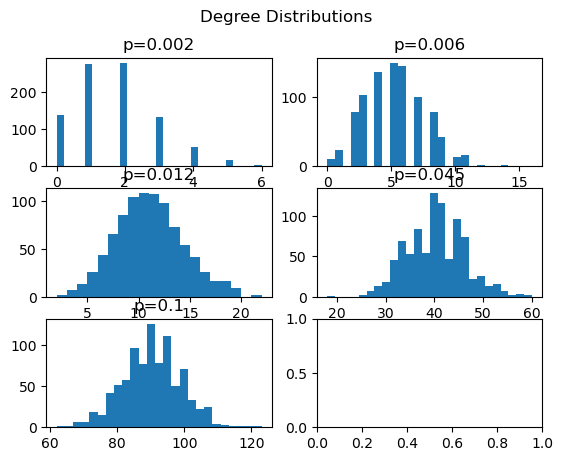

In [89]:
# 1a
# create an undirected random network
n_nodes = 900
probabilities = [0.002, 0.006, 0.012, 0.045, 0.1] # prob that edge exists b/w 2 vertices

fig, axs = plt.subplots(3, 2)
fig.suptitle('Degree Distributions')
theor_means = []
theor_vars = []
calc_means = []
calc_vars = []

for p, ax in zip(probabilities, axs.reshape(-1)):
    graph = ig.Graph.Erdos_Renyi(n=n_nodes, p=p, directed=False, loops=False)
    degrees = [v.degree() for v in graph.vs]

    # Theoretical mean and variance of degree distribution
    # we use (n-1) since a node can't connect to itself
    # Erdos-Renyi Graph follows a binomial distribution. These are binomial mean/var from wikipedia
    # https://chih-ling-hsu.github.io/2020/05/15/Gnp
    theor_means.append((n_nodes-1)*p)
    theor_vars.append((n_nodes-1)*p*(1-p))
    calc_means.append(np.mean(degrees))
    calc_vars.append(np.var(degrees))

    ax.hist(degrees, bins='auto')
    ax.title.set_text(f'p={p}')

print(pd.DataFrame({
    "Theoretical Mean": theor_means, 
    "Calc Mean": calc_means, 
    "Theoretical Variance": theor_vars, 
    "Calc Variance": calc_vars
}))

1b

# Part 2